Inladen data en imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the datasets
solar_data = pd.read_csv('datasets\solar.csv')
weather_data = pd.read_csv('datasets\weather.csv')
sunrise_sunset_data = pd.read_excel('datasets\sunrise-sunset.xlsx')

Bekijken van de datasets

In [2]:
print(solar_data.head(),solar_data.info(),solar_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  9705 non-null   object 
 1   kwh        9705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 151.8+ KB
                       timestamp   kwh
0  2023-03-11 16:00:10.160454+01  0.54
1  2023-03-11 17:00:10.217795+01  1.02
2  2023-03-11 18:00:10.284064+01  1.17
3  2023-03-11 19:00:10.224836+01  1.18
4  2023-03-11 20:00:10.201847+01  1.18 None                kwh
count  9705.000000
mean   1401.190049
std     741.801205
min       0.000000
25%     772.572600
50%    1737.388200
75%    1964.015800
max    2417.478800


In [3]:
print(weather_data.head(),weather_data.info(),weather_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39840 entries, 0 to 39839
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FID                          39840 non-null  object 
 1   the_geom                     39840 non-null  object 
 2   code                         39840 non-null  int64  
 3   timestamp                    39840 non-null  object 
 4   precip_quantity              6291 non-null   float64
 5   precip_range                 6417 non-null   float64
 6   temp                         39840 non-null  float64
 7   temp_min                     1660 non-null   float64
 8   temp_max                     1657 non-null   float64
 9   temp_grass_min               1189 non-null   float64
 10  wind_speed                   39827 non-null  float64
 11  wind_speed_unit              39840 non-null  int64  
 12  wind_direction               39414 non-null  float64
 13  wind_peak_speed 

In [4]:
print(sunrise_sunset_data.head(),sunrise_sunset_data.info(),sunrise_sunset_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datum           731 non-null    datetime64[ns]
 1   Opkomst         731 non-null    object        
 2   Op ware middag  731 non-null    object        
 3   Ondergang       731 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 23.0+ KB
       datum   Opkomst Op ware middag Ondergang
0 2023-01-01  08:45:00       12:46:00  16:47:00
1 2023-01-02  08:45:00       12:46:00  16:48:00
2 2023-01-03  08:45:00       12:47:00  16:49:00
3 2023-01-04  08:44:00       12:47:00  16:51:00
4 2023-01-05  08:44:00       12:48:00  16:52:00 None                      datum
count                  731
mean   2024-01-01 00:00:00
min    2023-01-01 00:00:00
25%    2023-07-02 12:00:00
50%    2024-01-01 00:00:00
75%    2024-07-01 12:00:00
max    2024-12-31 00:00:00


Data filteren en opkuisen

In [5]:
# De nodige waarden voor model productie behouden
weather_data = weather_data[['timestamp', 'temp','pressure','cloudiness','humidity_relative']]

In [6]:
weather_data.head()

,timestamp,temp,pressure,cloudiness,humidity_relative
0,2023-03-01T09:00:00,4.9,1029.7,0.0,54.3
1,2023-03-01T09:00:00,2.1,1029.3,NaN,73.7
2,2023-03-01T09:00:00,3.3,1029.6,1.0,NaN
3,2023-03-01T09:00:00,1.6,1029.4,NaN,70.9
4,2023-03-01T10:00:00,3.0,1028.8,NaN,60.8


In [7]:
#Opvullen van Nan waardes met laatse geldige waarde
weather_data.ffill(inplace=True)

#Getest alternatief -> gelijkaardige mae

  #Gebruik van interpolate
    #weather_data['humidity_relative'] = weather_data['humidity_relative'].interpolate(method='linear')
    #weather_data['cloudiness'] = weather_data['cloudiness'].interpolate(method='linear')

#Geteste alternativen -> slechtere mae

  #Gebruik median
    #humidity_relative_m = weather_data['humidity_relative'].median()
    #weather_data['humidity_relative'].fillna(humidity_relative_m, inplace=True)
  
  #Gebruik imputer (median)
    #imputer_m = SimpleImputer(strategy='median')
    #weather_data['cloudiness'] = imputer_m.fit_transform(weather_data[['cloudiness']])
    #weather_data['humidity_relative'] = imputer_m.fit_transform(weather_data[['humidity_relative']])

  # Gebruik imputer (mean)
    #imputer_me = SimpleImputer(strategy='mean')
    #weather_data['humidity_relative'] = imputer_me.fit_transform(weather_data[['humidity_relative']])

In [8]:
weather_data.head()

,timestamp,temp,pressure,cloudiness,humidity_relative
0,2023-03-01T09:00:00,4.9,1029.7,0.0,54.3
1,2023-03-01T09:00:00,2.1,1029.3,0.0,73.7
2,2023-03-01T09:00:00,3.3,1029.6,1.0,73.7
3,2023-03-01T09:00:00,1.6,1029.4,1.0,70.9
4,2023-03-01T10:00:00,3.0,1028.8,1.0,60.8


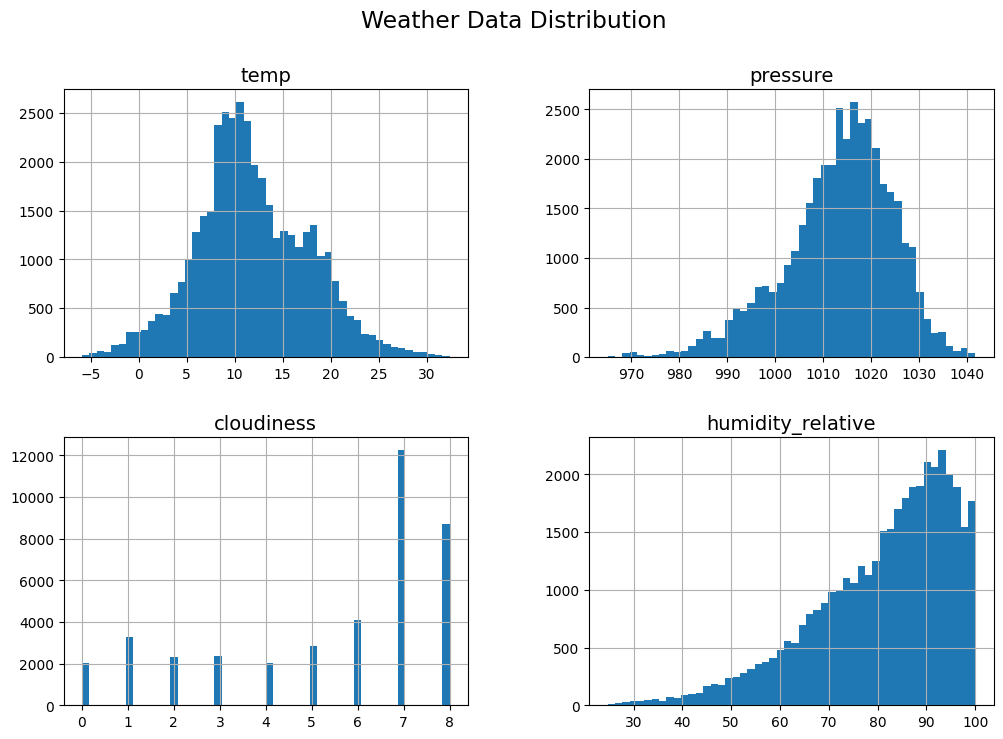

In [9]:
# Bekijken weather data in grafieken
plt.rc('font', size=14)  
plt.rc('axes', labelsize=14, titlesize=14)  
plt.rc('legend', fontsize=14)  
plt.rc('xtick', labelsize=10)  
plt.rc('ytick', labelsize=10)  

weather_columns = weather_data.columns.drop('timestamp') if 'timestamp' in weather_data.columns else weather_data.columns
weather_data[weather_columns].hist(bins=50, figsize=(12, 8))
plt.suptitle("Weather Data Distribution")
plt.show()

C:\Users\Robbe\AppData\Local\Temp\ipykernel_8036\3932623698.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  plt.plot(pd.to_datetime(solar_data['timestamp']), solar_data['kwh'])


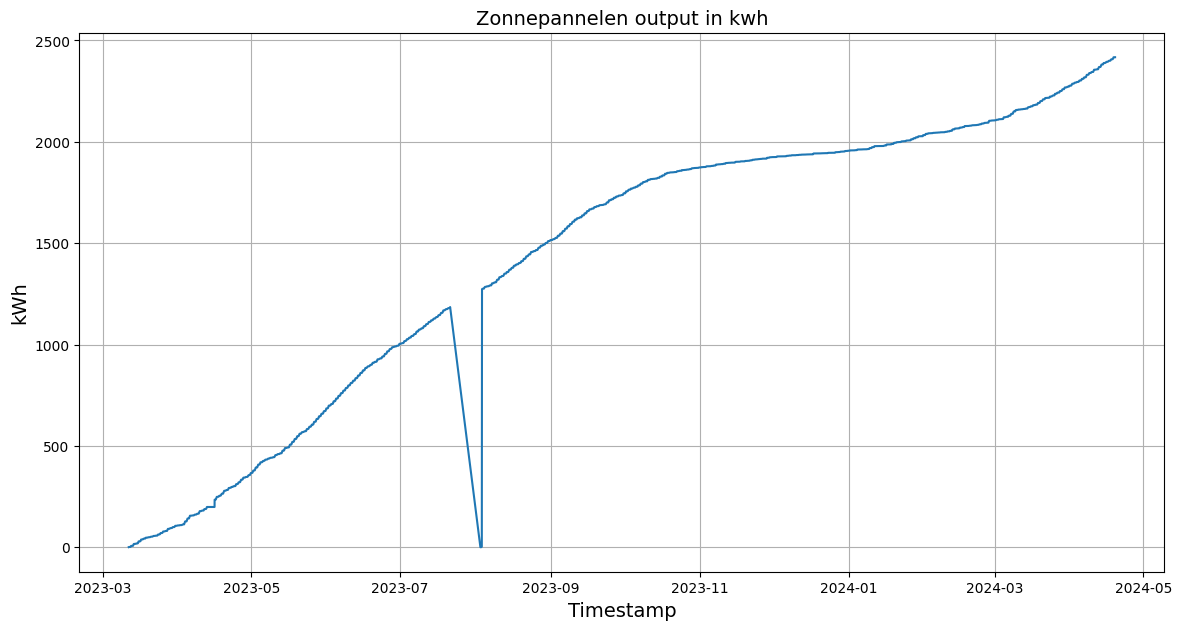

In [10]:
#Bekijken kwh data 
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(solar_data['timestamp']), solar_data['kwh'])
plt.title('Zonnepannelen output in kwh')
plt.xlabel('Timestamp')
plt.ylabel('kWh')
plt.grid(True)
plt.show()

In [11]:
# Alle kollomen waar de kwh lager is als de vorige worden er uit gefilterd
to_drop = []
last_valid_index = solar_data.index[0]  

for idx in solar_data.index[1:]:  
    if solar_data.at[idx, 'kwh'] < solar_data.at[last_valid_index, 'kwh']:
        to_drop.append(idx)
    else:
        last_valid_index = idx


solar_data.drop(to_drop, inplace=True)

# Alle kollomen hun kwh per uur worden berekend 
first_value = solar_data.iloc[0]['kwh']


solar_data['kwh'] = solar_data['kwh'].diff()

solar_data.iloc[0, solar_data.columns.get_loc('kwh')] = first_value


C:\Users\Robbe\AppData\Local\Temp\ipykernel_8036\2547119789.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  plt.plot(pd.to_datetime(solar_data['timestamp']), solar_data['kwh'])


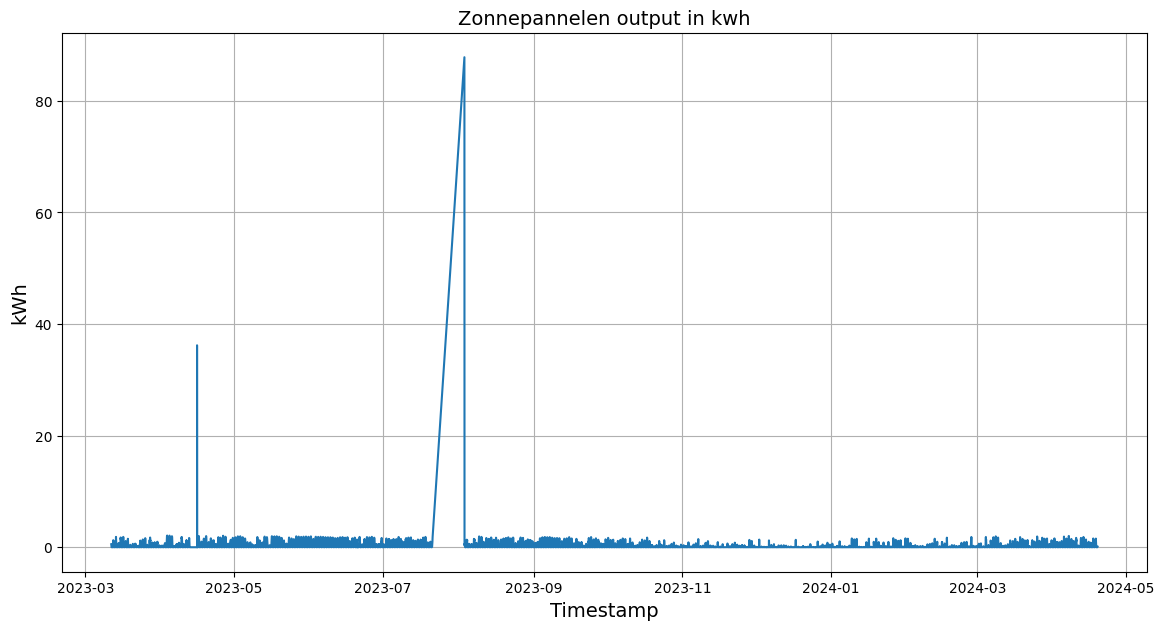

In [12]:
# Kijken voor onregelmatigheden in solar data
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(solar_data['timestamp']), solar_data['kwh'])
plt.title('Zonnepannelen output in kwh')
plt.xlabel('Timestamp')
plt.ylabel('kWh')
plt.grid(True)
plt.show()

In [13]:
#Verwijderen van de onregelmatigheden
solar_data = solar_data[solar_data['kwh'] < 10]

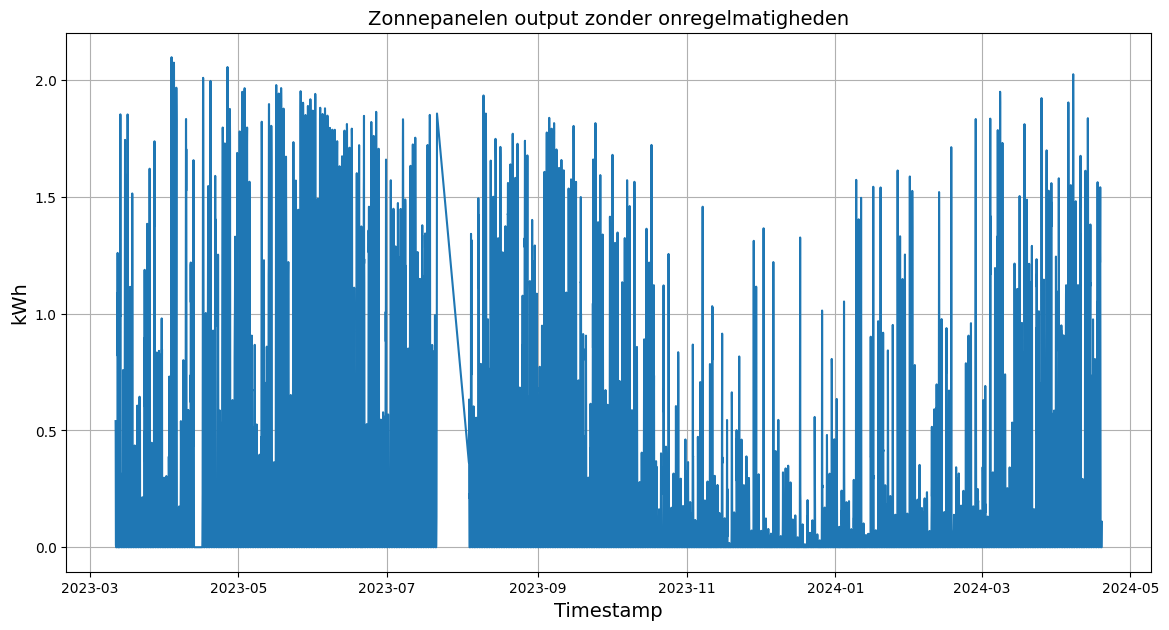

In [14]:
# Kijken voor meer onregelmatigheden
solar_data['timestamp'] = pd.to_datetime(solar_data['timestamp'], utc=True)
plt.figure(figsize=(14, 7))
plt.plot(solar_data['timestamp'], solar_data['kwh'])
plt.title('Zonnepanelen output zonder onregelmatigheden')
plt.xlabel('Timestamp')
plt.ylabel('kWh')
plt.grid(True)
plt.show()

In [15]:
sunrise_sunset_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datum           731 non-null    datetime64[ns]
 1   Opkomst         731 non-null    object        
 2   Op ware middag  731 non-null    object        
 3   Ondergang       731 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 23.0+ KB


In [17]:
# Mergen datasets
solar_data['timestamp'] = pd.to_datetime(solar_data['timestamp'], errors='coerce', utc=True)
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'], errors='coerce', utc=True)

solar_data['timestamp'] = solar_data['timestamp'].dt.tz_convert(None)
weather_data['timestamp'] = weather_data['timestamp'].dt.tz_convert(None)

data = pd.merge_asof(solar_data.sort_values('timestamp'), weather_data.sort_values('timestamp'), on='timestamp', direction='nearest')

In [18]:
data.head()

,timestamp,kwh,temp,pressure,cloudiness,humidity_relative
0,2023-03-11 15:00:10.160454,0.54,7.4,1012.2,6.0,52.0
1,2023-03-11 16:00:10.217795,0.48,5.8,1011.5,7.0,66.0
2,2023-03-11 17:00:10.284064,0.15,5.5,1011.6,7.0,65.4
3,2023-03-11 18:00:10.224836,0.01,5.4,1011.9,7.0,65.7
4,2023-03-11 19:00:10.201847,0.00,5.9,1011.5,7.0,64.9


In [19]:
data = pd.merge_asof(data, sunrise_sunset_data, left_on='timestamp', right_on='datum', direction='nearest')

In [20]:
data.head()

,timestamp,kwh,temp,pressure,cloudiness,humidity_relative,datum,Opkomst,Op ware middag,Ondergang
0,2023-03-11 15:00:10.160454,0.54,7.4,1012.2,6.0,52.0,2023-03-12,07:04:00,12:52:00,18:42:00
1,2023-03-11 16:00:10.217795,0.48,5.8,1011.5,7.0,66.0,2023-03-12,07:04:00,12:52:00,18:42:00
2,2023-03-11 17:00:10.284064,0.15,5.5,1011.6,7.0,65.4,2023-03-12,07:04:00,12:52:00,18:42:00
3,2023-03-11 18:00:10.224836,0.01,5.4,1011.9,7.0,65.7,2023-03-12,07:04:00,12:52:00,18:42:00
4,2023-03-11 19:00:10.201847,0.00,5.9,1011.5,7.0,64.9,2023-03-12,07:04:00,12:52:00,18:42:00


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          9391 non-null   datetime64[ns]
 1   kwh                9391 non-null   float64       
 2   temp               9391 non-null   float64       
 3   pressure           9391 non-null   float64       
 4   cloudiness         9391 non-null   float64       
 5   humidity_relative  9391 non-null   float64       
 6   datum              9391 non-null   datetime64[ns]
 7   Opkomst            9391 non-null   object        
 8   Op ware middag     9391 non-null   object        
 9   Ondergang          9391 non-null   object        
dtypes: datetime64[ns](2), float64(5), object(3)
memory usage: 733.8+ KB


In [22]:
# De datums van een object naar een timestamp omzetten
data['Opkomst'] = data['Opkomst'].astype(str)
data['Ondergang'] = data['Ondergang'].astype(str)
data['Op ware middag'] = data['Op ware middag'].astype(str)

# Maken datetime object
data['Opkomst'] = pd.to_datetime(data['timestamp'].dt.date.astype(str) + ' ' + data['Opkomst'])
data['Ondergang'] = pd.to_datetime(data['timestamp'].dt.date.astype(str) + ' ' + data['Ondergang'])
data['Op ware middag'] = pd.to_datetime(data['timestamp'].dt.date.astype(str) + ' ' + data['Op ware middag'])


In [23]:
data.head()

,timestamp,kwh,temp,pressure,cloudiness,humidity_relative,datum,Opkomst,Op ware middag,Ondergang
0,2023-03-11 15:00:10.160454,0.54,7.4,1012.2,6.0,52.0,2023-03-12,2023-03-11 07:04:00,2023-03-11 12:52:00,2023-03-11 18:42:00
1,2023-03-11 16:00:10.217795,0.48,5.8,1011.5,7.0,66.0,2023-03-12,2023-03-11 07:04:00,2023-03-11 12:52:00,2023-03-11 18:42:00
2,2023-03-11 17:00:10.284064,0.15,5.5,1011.6,7.0,65.4,2023-03-12,2023-03-11 07:04:00,2023-03-11 12:52:00,2023-03-11 18:42:00
3,2023-03-11 18:00:10.224836,0.01,5.4,1011.9,7.0,65.7,2023-03-12,2023-03-11 07:04:00,2023-03-11 12:52:00,2023-03-11 18:42:00
4,2023-03-11 19:00:10.201847,0.00,5.9,1011.5,7.0,64.9,2023-03-12,2023-03-11 07:04:00,2023-03-11 12:52:00,2023-03-11 18:42:00


In [24]:
# De datums omzetten naar een unix formaat voor model
data['Opkomst'] = pd.to_datetime(data['Opkomst'])
data['Op ware middag'] = pd.to_datetime(data['Op ware middag'])
data['Ondergang'] = pd.to_datetime(data['Ondergang'])

data['Opkomst'] = data['Opkomst'].apply(lambda x: int(x.timestamp()))
data['Op ware middag'] = data['Op ware middag'].apply(lambda x: int(x.timestamp()))
data['Ondergang'] = data['Ondergang'].apply(lambda x: int(x.timestamp()))

In [25]:
data.head()

,timestamp,kwh,temp,pressure,cloudiness,humidity_relative,datum,Opkomst,Op ware middag,Ondergang
0,2023-03-11 15:00:10.160454,0.54,7.4,1012.2,6.0,52.0,2023-03-12,1678518240,1678539120,1678560120
1,2023-03-11 16:00:10.217795,0.48,5.8,1011.5,7.0,66.0,2023-03-12,1678518240,1678539120,1678560120
2,2023-03-11 17:00:10.284064,0.15,5.5,1011.6,7.0,65.4,2023-03-12,1678518240,1678539120,1678560120
3,2023-03-11 18:00:10.224836,0.01,5.4,1011.9,7.0,65.7,2023-03-12,1678518240,1678539120,1678560120
4,2023-03-11 19:00:10.201847,0.00,5.9,1011.5,7.0,64.9,2023-03-12,1678518240,1678539120,1678560120


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          9391 non-null   datetime64[ns]
 1   kwh                9391 non-null   float64       
 2   temp               9391 non-null   float64       
 3   pressure           9391 non-null   float64       
 4   cloudiness         9391 non-null   float64       
 5   humidity_relative  9391 non-null   float64       
 6   datum              9391 non-null   datetime64[ns]
 7   Opkomst            9391 non-null   int64         
 8   Op ware middag     9391 non-null   int64         
 9   Ondergang          9391 non-null   int64         
dtypes: datetime64[ns](2), float64(5), int64(3)
memory usage: 733.8 KB


Feature Engineering

In [27]:
# Features toevoegen
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month
data['day_length'] = (data['Ondergang'] - data['Opkomst']) / 3600 


data['time'] = pd.to_datetime(data['timestamp'], unit='s')
data['middag'] = pd.to_datetime(data['Op ware middag'], unit='s')
data['Afstand_tot_middag'] = (data['time'] - data['middag']).dt.total_seconds().abs() / 60


In [28]:
data.head()

,timestamp,kwh,temp,pressure,cloudiness,humidity_relative,datum,Opkomst,Op ware middag,Ondergang,hour,day,month,day_length,time,middag,Afstand_tot_middag
0,2023-03-11 15:00:10.160454,0.54,7.4,1012.2,6.0,52.0,2023-03-12,1678518240,1678539120,1678560120,15,11,3,11.633333,2023-03-11 15:00:10.160454,2023-03-11 12:52:00,128.169341
1,2023-03-11 16:00:10.217795,0.48,5.8,1011.5,7.0,66.0,2023-03-12,1678518240,1678539120,1678560120,16,11,3,11.633333,2023-03-11 16:00:10.217795,2023-03-11 12:52:00,188.170297
2,2023-03-11 17:00:10.284064,0.15,5.5,1011.6,7.0,65.4,2023-03-12,1678518240,1678539120,1678560120,17,11,3,11.633333,2023-03-11 17:00:10.284064,2023-03-11 12:52:00,248.171401
3,2023-03-11 18:00:10.224836,0.01,5.4,1011.9,7.0,65.7,2023-03-12,1678518240,1678539120,1678560120,18,11,3,11.633333,2023-03-11 18:00:10.224836,2023-03-11 12:52:00,308.170414
4,2023-03-11 19:00:10.201847,0.00,5.9,1011.5,7.0,64.9,2023-03-12,1678518240,1678539120,1678560120,19,11,3,11.633333,2023-03-11 19:00:10.201847,2023-03-11 12:52:00,368.170031


Testen model

In [29]:
# Nodige kollomen voor training selecteren
X = data[['temp', 'pressure', 'cloudiness', 'humidity_relative', 'hour', 'day', 'month','day_length','Opkomst','Op ware middag','Ondergang','Afstand_tot_middag']]
y = data['kwh']

In [30]:
# Opdelen in training en test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Modellen trainen
from pyexpat import model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, StackingRegressor

models = {
         "model1": RandomForestRegressor(n_estimators=100, random_state=42),
         "model2": LinearRegression(),
         "model3": GradientBoostingRegressor(n_estimators=100, random_state=42),
         "model4" : DecisionTreeRegressor(random_state=42),
         "model5": VotingRegressor(
                      estimators=[
                        ('rf', RandomForestRegressor(random_state=42)),
                        ('dt', DecisionTreeRegressor(random_state=42))
                      ] 
                    ),
         "model6": StackingRegressor(
                    estimators = [
                      ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
                      ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42))
                    ],
                    final_estimator=LinearRegression(),
                    cv=5
                  )

  } 

for name ,model in models.items():
  model.fit(X_train, y_train)


In [32]:
# MAE van modellen vergelijken
from sklearn.metrics import mean_absolute_error

for naam ,model in models.items():
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  print(f' {naam} MAE: {mae}')

 model1 MAE: 0.06857912932411248
 model2 MAE: 0.22417761563030467
 model3 MAE: 0.08598758192291432
 model4 MAE: 0.09143241085683501
 model5 MAE: 0.07556784087280388
 model6 MAE: 0.07112919172910429


In [87]:
# Kijken welke parameters het beste zijn voor model 1
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],  
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=models["model1"], param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Beste parameters voor RandomForestRegressor:", grid_search.best_params_)
print("Beste MAE score voor RandomForestRegressor:", -grid_search.best_score_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Beste parameters voor RandomForestRegressor: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Beste MAE score voor RandomForestRegressor: 0.06324627914118595


In [86]:
# Testen beste model met parameters van gridsearch
modelBest= RandomForestRegressor(max_depth =None, max_features = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators =200)
      
modelBest.fit(X_train, y_train)

y_pred = modelBest.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f' modelBest MAE: {mae}')

 modelBest MAE: 0.06880030707823627


In [56]:
# Beste model opslaan
import joblib

joblib.dump(models["model1"], 'C:\\Users\\Robbe\\Documents\\School_jaar_2\\sem2\\ML\\projectFinal\\model\\BesteModel.pkl')

['C:\\Users\\Robbe\\Documents\\School_jaar_2\\sem2\\ML\\projectFinal\\model\\BesteModel2.pkl']

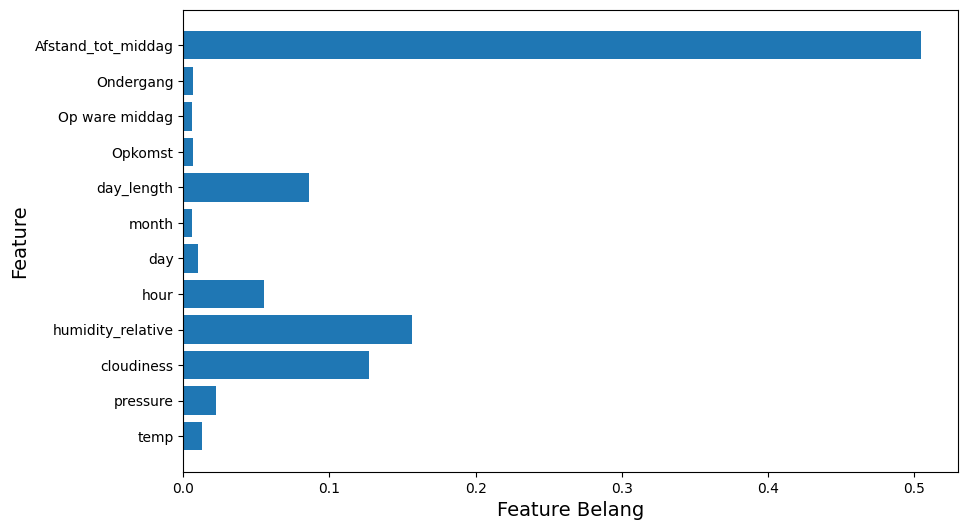

In [57]:
# Kijken welke Feature het belangerijkste is
def plot_feature_importance(model, features):
    plt.figure(figsize=(10, 6))
    n_features = len(features)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature Belang")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importance(models["model1"], X_train.columns)
plt.show()